In [4]:
#Requires:
# pip install -U kaleido==0.1.0post1
import pandas as pd

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import kaleido
from IPython.display import SVG, display
import plotly.io as pio 

from sklearn.feature_selection import RFECV, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score, recall_score,confusion_matrix
from sklearn.metrics import classification_report


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Análise dos dados - IMDB Jogos

## Dicionário de dados

| Índice | Nome da Coluna | Tipo de Coluna | Descrição
|:--: | :--: | :--: | :--: |
|0  | title                    | categorica nominal | Title
|1  | console                  | categorica nominal | A consola em que o jogo foi lançado
|2  | alcohol_reference        | categorica nominal | Referência a bebidas alcoólicas e/ou imagens de bebidas alcoólicas. 
|3  | animated_blood           | categorica nominal | Representações descoloradas e/ou irrealistas de sangue.
|4  | blood                    | categorica nominal | Representações de sangue.
|5  | blood_and_gore           | categorica nominal | Representações de sangue ou de mutilação de partes do corpo. 
|6  | cartoon_violence         | categorica nominal | Acções violentas que envolvem situações e personagens de desenhos animados.
|7  | crude_humor              | categorica nominal | Representações ou diálogos que envolvam cenas vulgares, incluindo humor de "casa de banho".
|8  | drug_reference           | categorica nominal | Referência e/ou imagens de drogas ilegais.
|9  | fantasy_violence         | categorica nominal | Acções violentas de natureza fantasiosa, envolvendo personagens humanas ou não humanas em situações facilmente distinguíveis da vida real.
|10 | intense_violence         | categorica nominal | Representações gráficas e realistas de conflitos físicos. Envolve sangue extremo e/ou realista, armas e representações de ferimentos e mortes humanas. 
|11 | language                 | categorica nominal | Utilização moderada de palavrões.
|12 | lyrics                   | categorica nominal | Referências a profanação, sexualidade, violência, álcool ou consumo de drogas na música.
|13 | mature_humor             | categorica nominal | Representações ou diálogos que envolvam humor "adulto", incluindo referências sexuais.
|14 | mild_blood               | categorica nominal | Algum sangue
|15 | mild_cartoon_violence    | categorica nominal | Algumas acções violentas envolvendo desenhos animados.
|16 | mild_fantasy_violence    | categorica nominal | Algumas acções violentas de natureza fantasiosa.
|17 | mild_language            | categorica nominal | Utilização ligeira a moderada de palavrões.
|18 | mild_lyrics              | categorica nominal | Referências ligeiras a profanação, sexualidade, violência, álcool ou consumo de drogas na música.
|19 | mild_suggestive_themes   | categorica nominal | algumas referências ou materiais provocadores
|20 | mild_violence            | categorica nominal | Algumas cenas que envolvem conflitos agressivos.
|21 | no_descriptors           | categorica nominal | Não há descritores de conteúdo. 
|22 | nudity                   | categorica nominal | Representações gráficas ou prolongadas de nudez.
|23 | partial_nudity           | categorica nominal | Representações breves e/ou ligeiras de nudez.
|24 | sexual_content           | categorica nominal | Representações não explícitas de comportamentos sexuais, incluindo eventualmente nudez parcial.
|25 | sexual_themes            | categorica nominal | Referências a sexo ou sexualidade. 
|26 | simulated_gambling       | categorica nominal | O jogador pode jogar sem apostar ou apostar dinheiro ou moeda real. 
|27 | strong_janguage          | categorica nominal | Utilização explícita e/ou frequente de palavrões.
|28 | strong_sexual_content    | categorica nominal | Representações explícitas e/ou frequentes de comportamentos sexuais, possivelmente incluindo nudez.
|29 | suggestive_themes        | categorica nominal | Referências ou materiais provocadores.
|30 | use_of_alcohol           | categorica nominal | O consumo de bebidas alcoólicas.
|31 | use_of_drugs_and_alcohol | categorica nominal | O consumo de bebidas alcoólicas e de drogas.
|32 | violence                 | categorica nominal | Cenas de conflito agressivo. Pode conter desmembramentos sem sangue.
|33 | esrb_rating              | categorica nominal | Classificação: RP - EC - E - E+10 - T - M - A

## Etapas de desenvolvimento

<ul>
<li>Análise de dimensionalidade dos dados</li>
<li>Análise de nulos e tipagem das variáveis</li>
<li>Análise visual de dimensionalidade da coluna alvo</li>
<li>Análise empírica de seleção de colunas</li>
<li>Seleção de colunas utilizando RFECV e RFE</li>
</ul>

# Análise de dados

## Análise de dimensionalidade de dados

In [5]:
df = pd.read_csv(r'.\Video_games_esrb_rating.csv')

In [6]:
print(f'A base de dados contêm: {df.shape[0]} linhas')
print(f'A base de dados contêm: {df.shape[1]} colunas')

A base de dados contêm: 1895 linhas
A base de dados contêm: 34 colunas


## Análise de nulos e tipagem das variáveis

In [7]:
def search_nulls(dataframe):
    if df[df.isnull()].dropna().shape[0] == 0:
        print('A base de dados não contêm nulos !')
    else:
        print(f'A base de dados contêm: {df[df.isnull()].dropna().shape[1]} nulos')

In [8]:
search_nulls(df)

A base de dados não contêm nulos !


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     1895 non-null   object
 1   console                   1895 non-null   int64 
 2   alcohol_reference         1895 non-null   int64 
 3   animated_blood            1895 non-null   int64 
 4   blood                     1895 non-null   int64 
 5   blood_and_gore            1895 non-null   int64 
 6   cartoon_violence          1895 non-null   int64 
 7   crude_humor               1895 non-null   int64 
 8   drug_reference            1895 non-null   int64 
 9   fantasy_violence          1895 non-null   int64 
 10  intense_violence          1895 non-null   int64 
 11  language                  1895 non-null   int64 
 12  lyrics                    1895 non-null   int64 
 13  mature_humor              1895 non-null   int64 
 14  mild_blood              

## Análise visual de dimensionalidade da coluna alvo

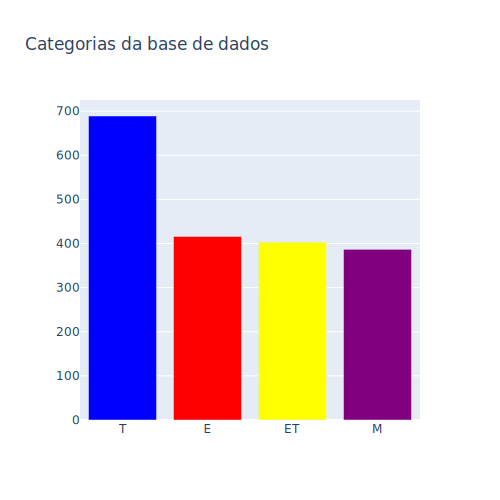

In [10]:
fig = go.Figure()
color = ['blue', 'red','yellow', 'purple']
fig.add_trace(
    go.Bar(
        x = df['esrb_rating'].value_counts().index,
        y = df['esrb_rating'].value_counts().values,
        marker_color = color
    )
)
fig.update_layout(
    title = 'Categorias da base de dados'
    ,width = 500, height = 500)

img_bytes_avaliadores = pio.to_image(fig, format="svg", engine='kaleido')
display(SVG(img_bytes_avaliadores))

Através do gráfico acima é possível verificar que a base está desbalanceada, então é possível considerar que será necessários efetuar alguma estrategia de balanceamento de dados (undersampling ou oversampling)

## Análise empírica de seleção de colunas

In [11]:
rename_esrb = {'E': 0,'ET': 1,'M': 2,'T': 3}
df_corr = df.copy()
df_corr.replace(rename_esrb, inplace=True)
df_corr.drop('title', axis = 1, inplace=True) 
df_corr = df_corr.corr(method='pearson')

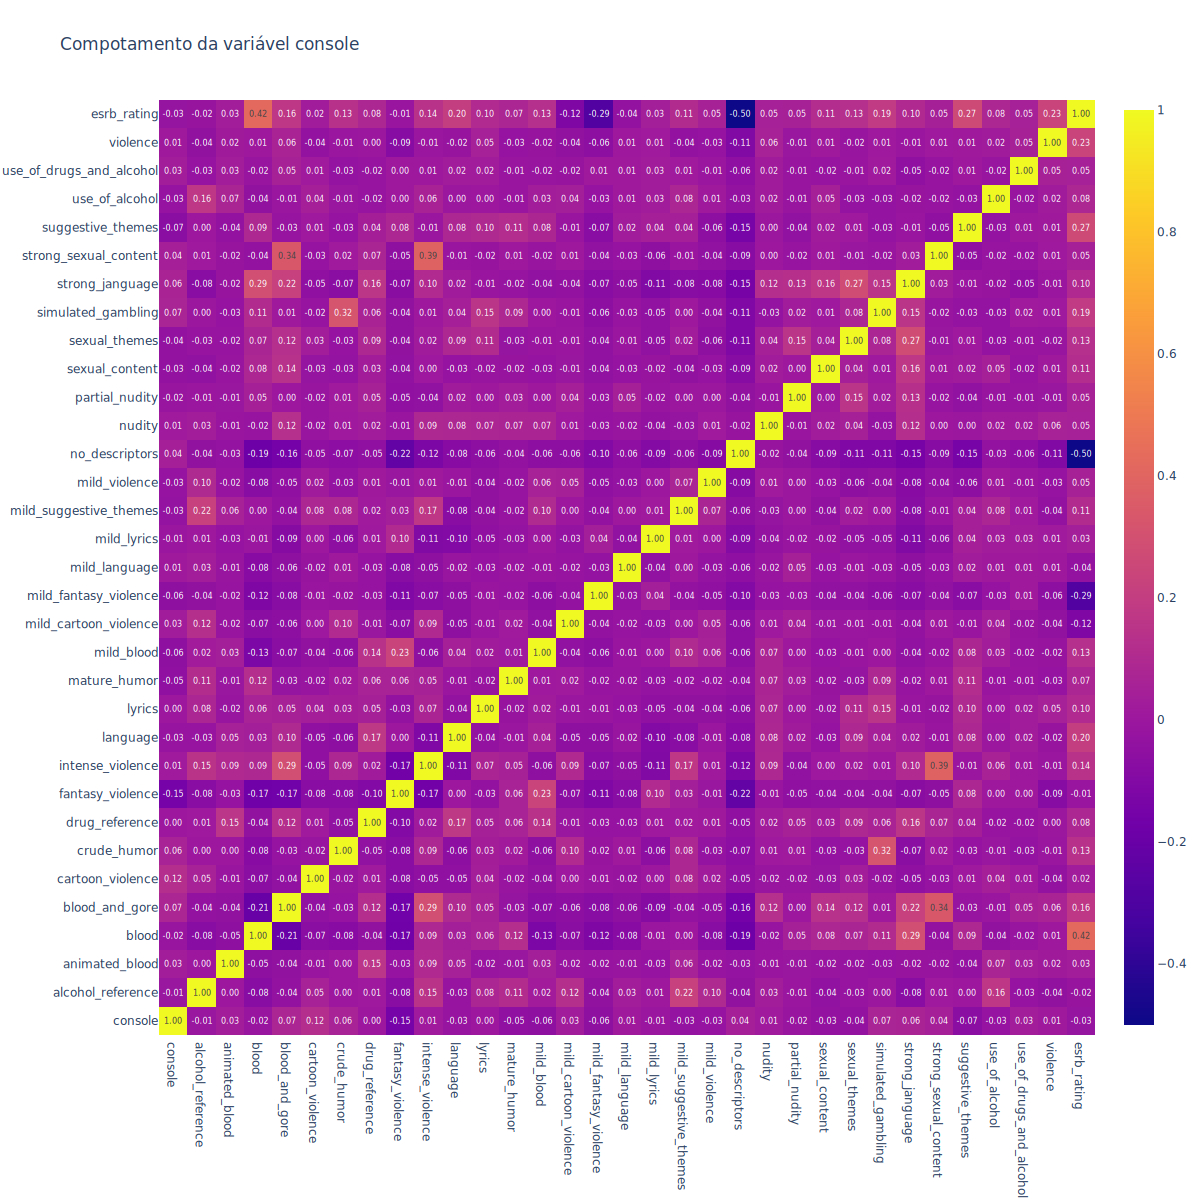

In [12]:
fig = go.Figure()
fig.add_trace(
    go.Heatmap(
        x= df_corr.columns,
        y= df_corr.index,
        z= df_corr,
        text=df_corr.values,
        texttemplate='%{text:.2f}'
        )
)
fig.update_layout(
    width = 1200, height = 1200,
    title_text = f'Compotamento da variável {df.columns[1]}',
    barmode='relative',
    )
img_bytes_avaliadores = pio.to_image(fig, format="svg")
display(SVG(img_bytes_avaliadores))

In [13]:
results_corr = {}
for i in ['spearman', 'kendall', 'pearson']: # Para armazenar os resultados das correlações disponíveis no pandas em um dicionário
    df_corr = df_corr.corr(method='spearman')
    values = pd.concat([df_corr[df_corr['esrb_rating']>0.2]['esrb_rating'],df_corr[df_corr['esrb_rating']<-0.2]['esrb_rating']]) # Foi admitido 0.1 tanto positivo quanto negativo
    results_corr[i] = values

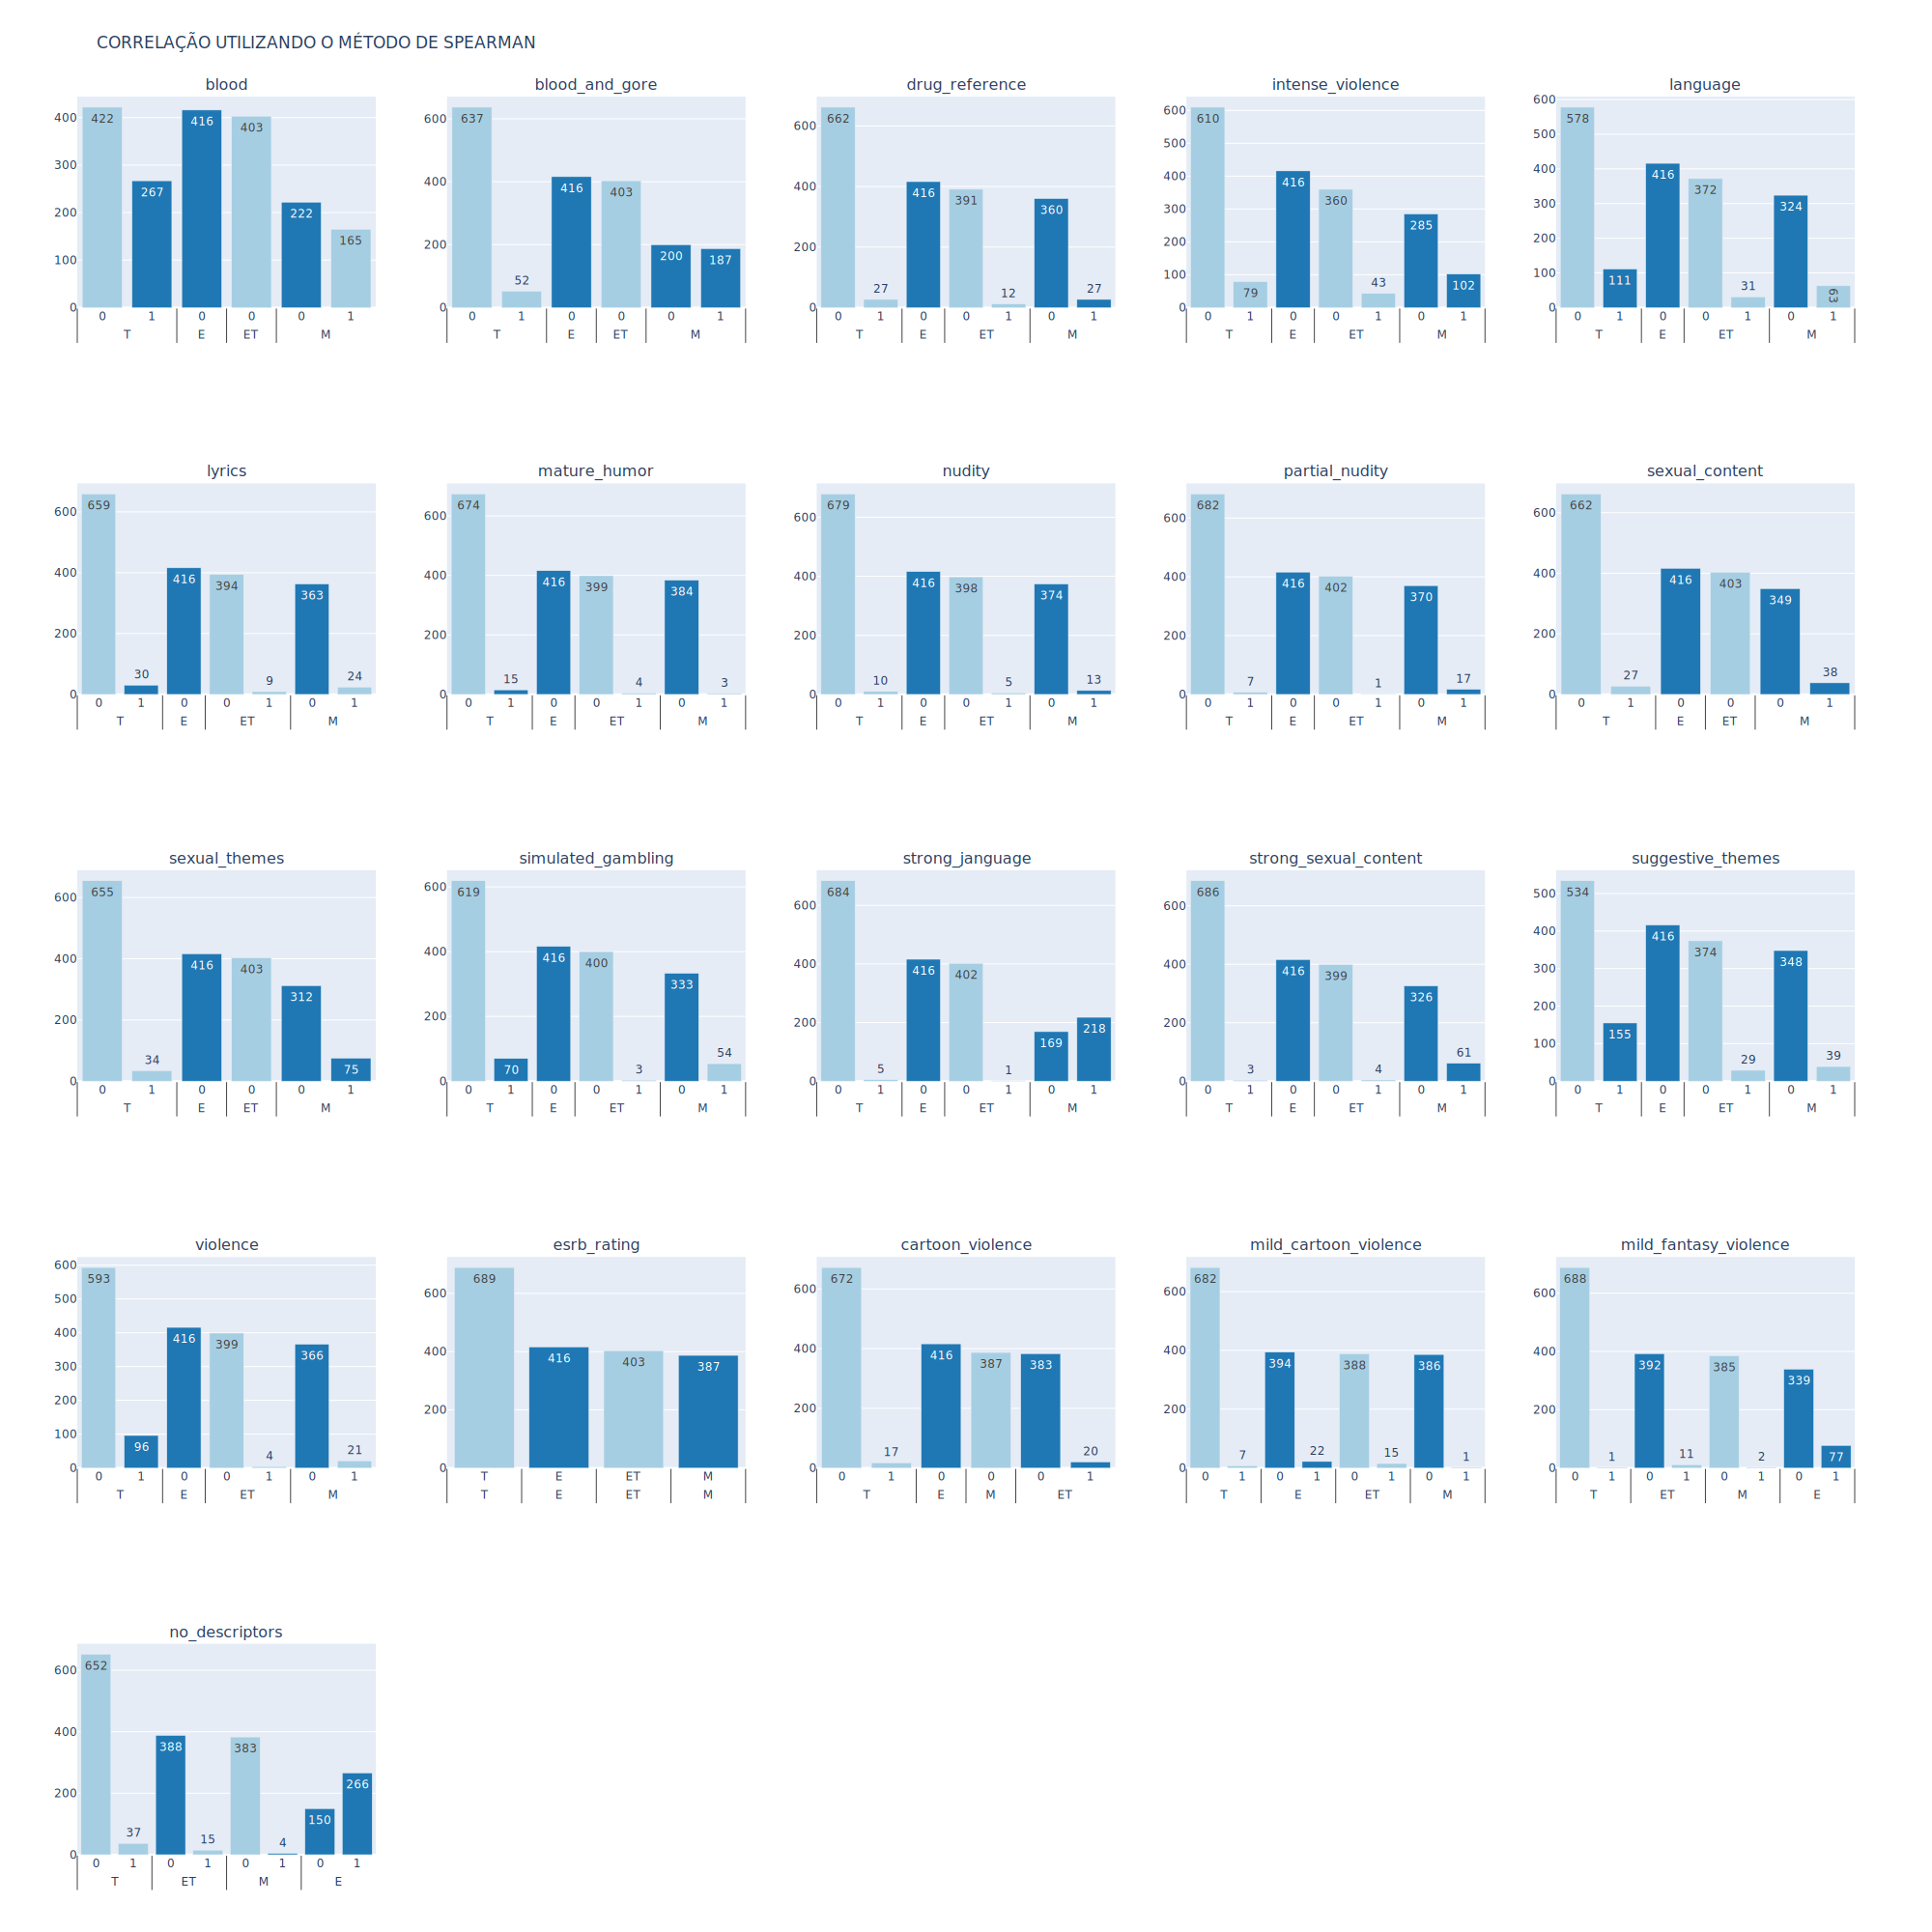

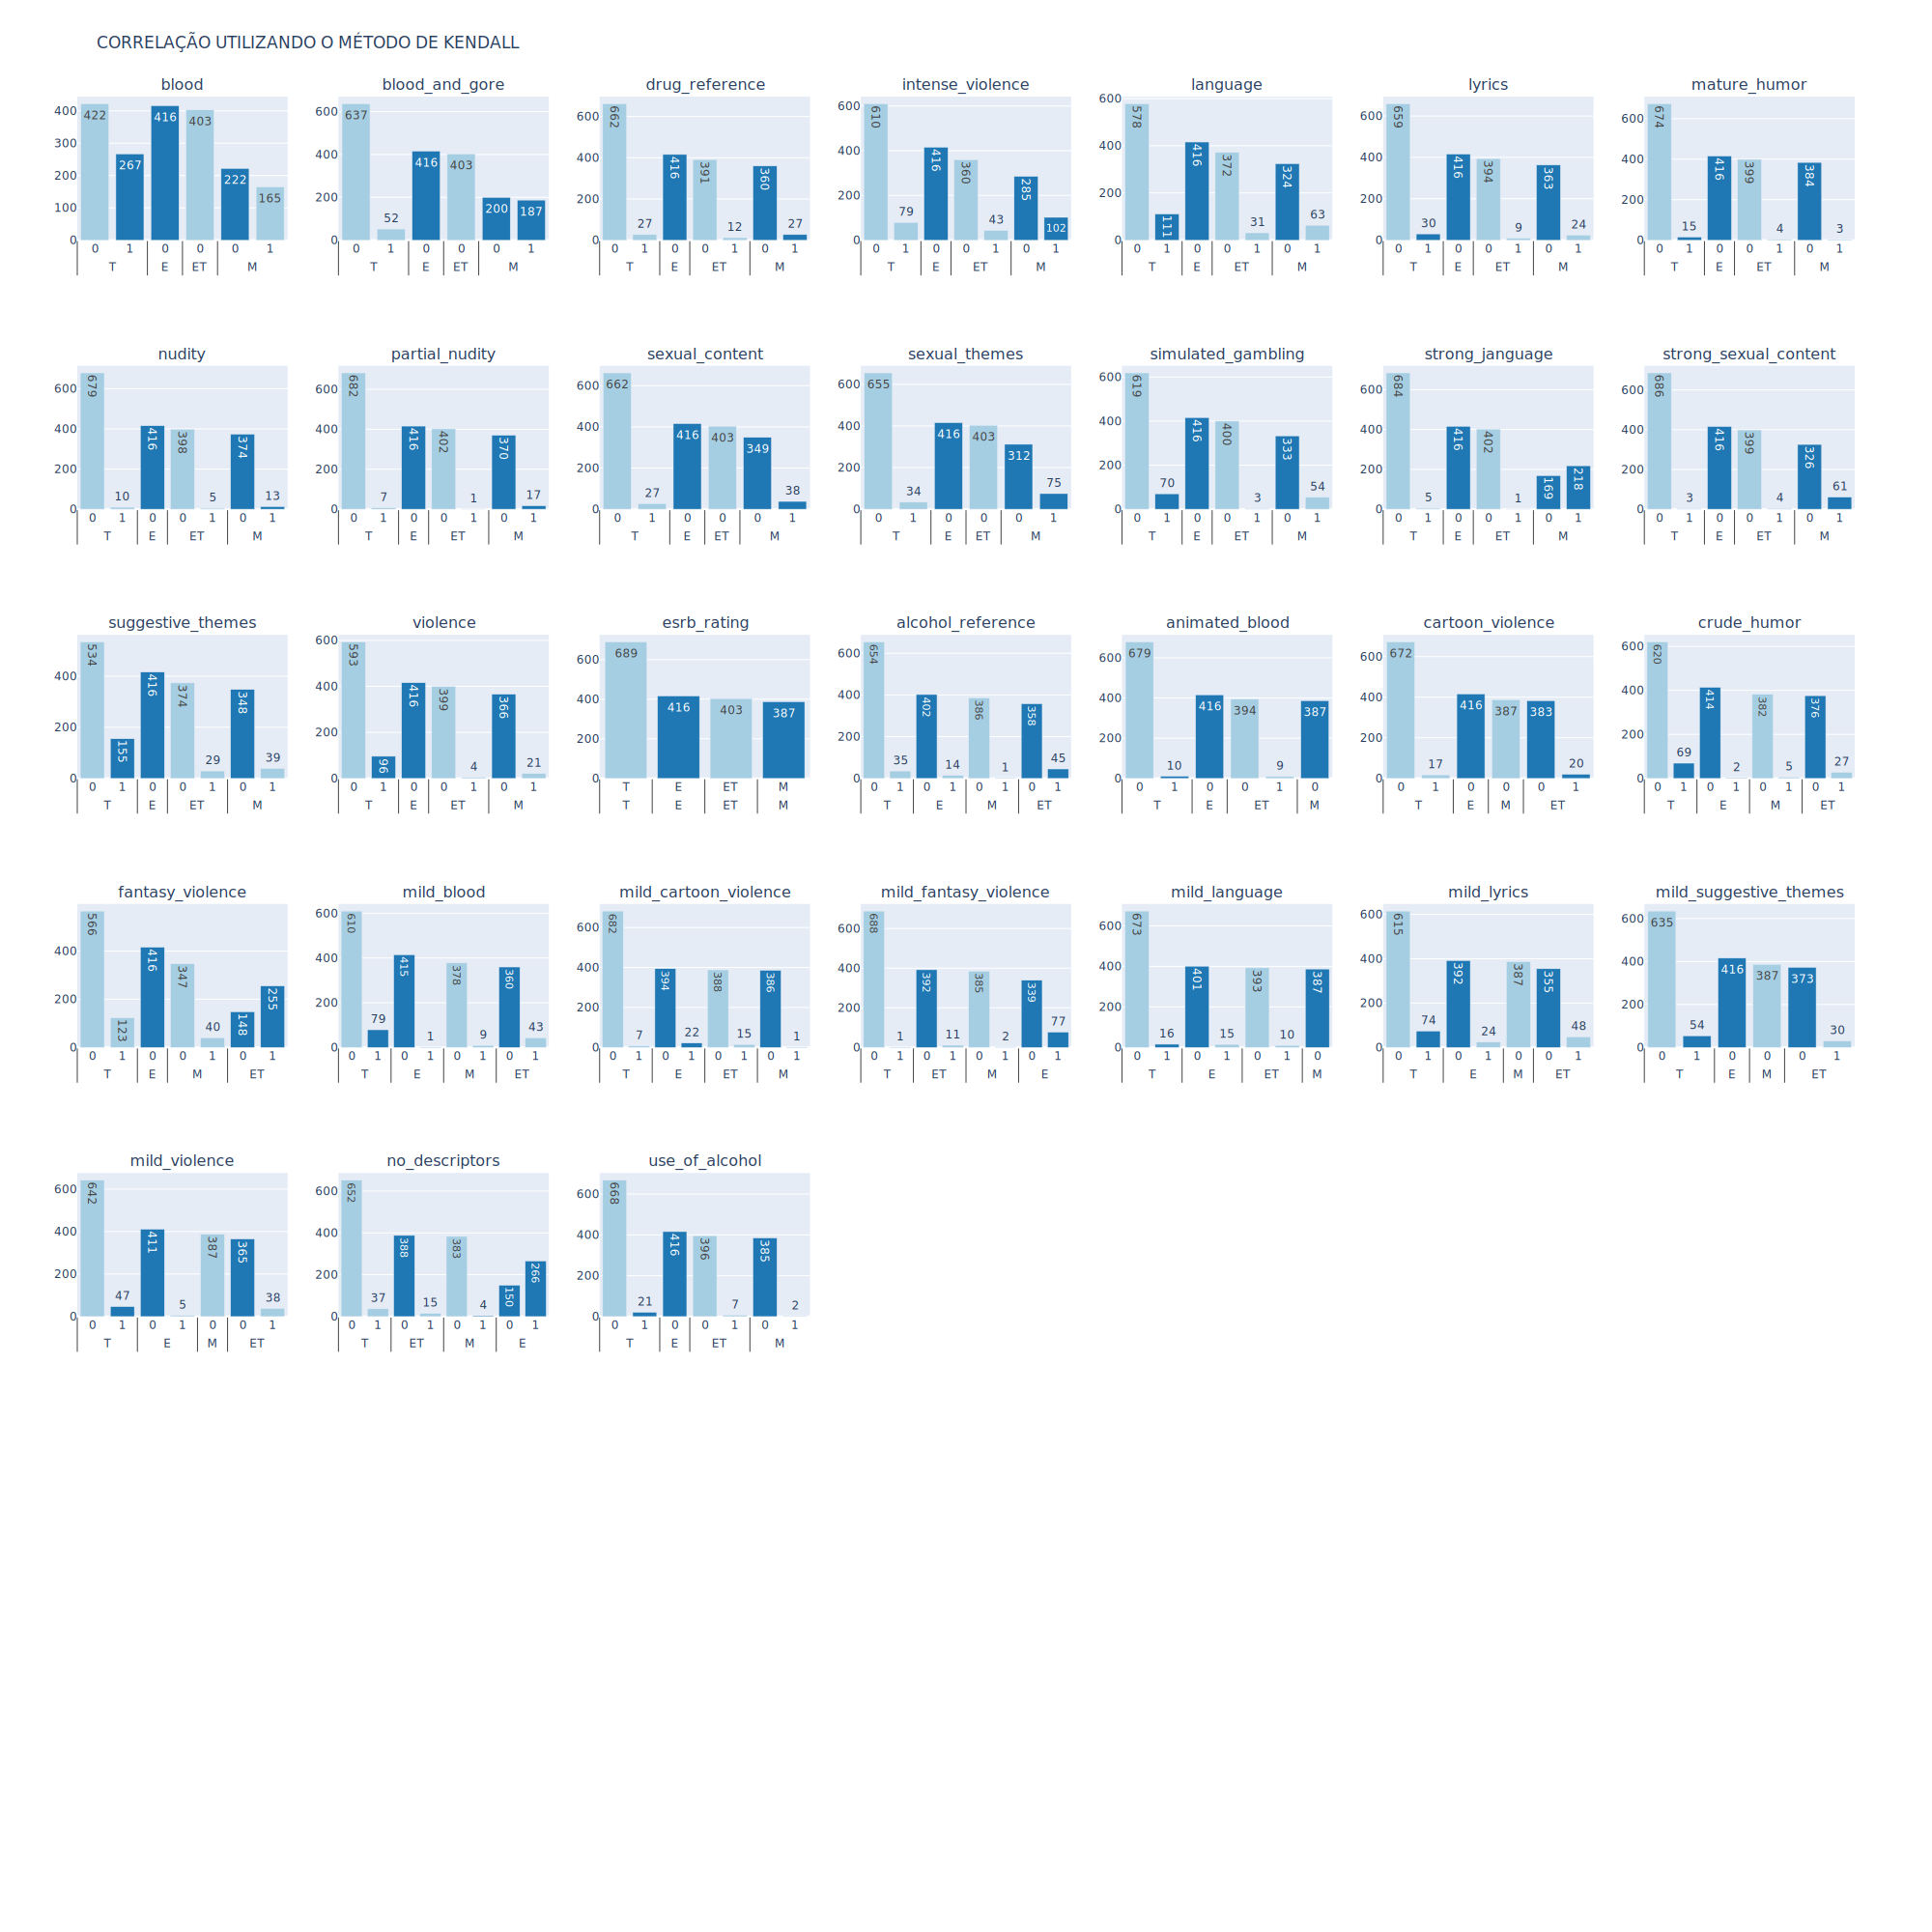

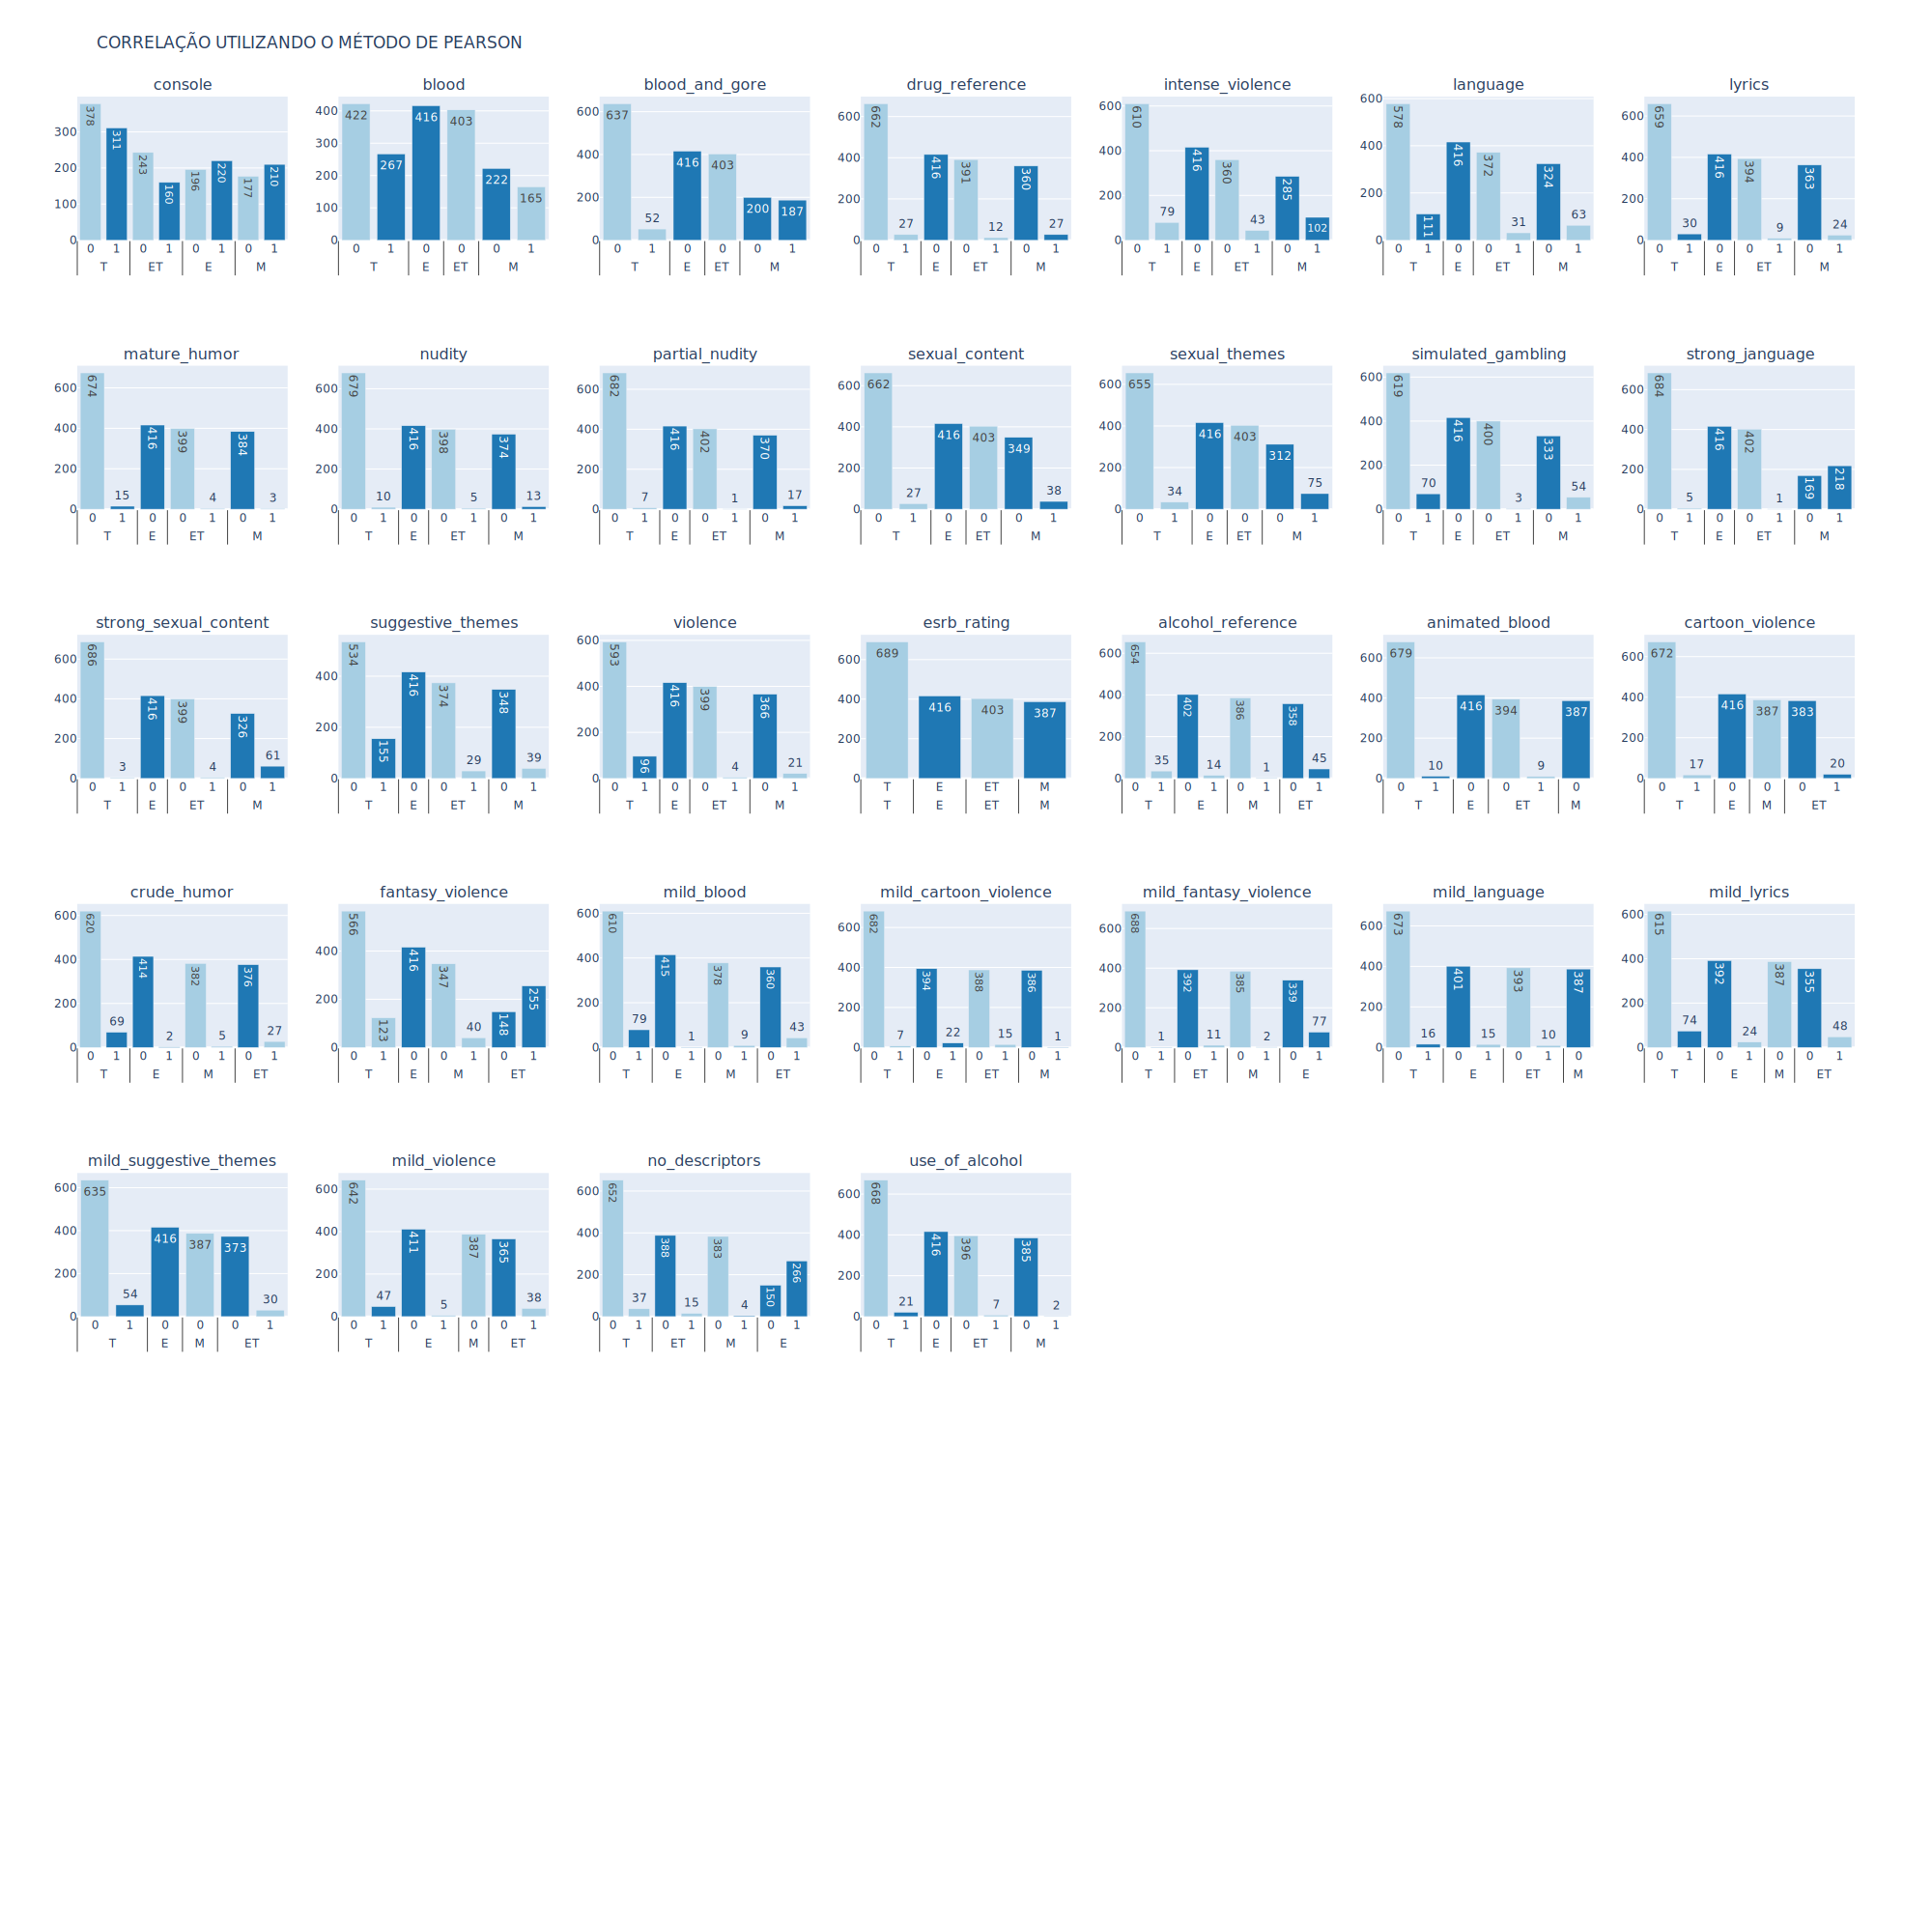

In [14]:
colors = ['rgb(166,206,227)', 'rgb(31,120,180)', 'rgb(166,206,227)', 'rgb(31,120,180)', 'rgb(31,120,180)', 'rgb(166,206,227)', 'rgb(166,206,227)', 'rgb(31,120,180)']

for i in results_corr:
    fig = make_subplots(rows= int(round(len(results_corr[i]) / 5,0))+1, cols=int(round(len(results_corr[i]) / 5,0))+1, subplot_titles=[x for x in results_corr[i].index])
    row = 1
    col = 1
    for j in range(len(results_corr[i])):
        if col < int(round(len(results_corr[i]) / 5,0))+1:
            fig.add_trace(
                go.Bar(
                    x = [[list(df.value_counts(['esrb_rating',results_corr[i].index[j]]).index)[x][0] for x in range(len(list(df.value_counts(['esrb_rating',results_corr[i].index[j]]).index)))], [list(df.value_counts(['esrb_rating',results_corr[i].index[j]]).index)[x][1] for x in range(len(list(df.value_counts(['esrb_rating',results_corr[i].index[j]]).index)))]], #Monta uma lista desta forma [['E','E'],[0,1]], para que seja possível trabalhar com multiindex
                    y = df.value_counts(['esrb_rating',results_corr[i].index[j]]).values,
                    marker_color = colors,
                    text = df.value_counts(['esrb_rating',results_corr[i].index[j]]).values,
                ), row = row , col = col)
            
            fig.update_layout(
                title=f'CORRELAÇÃO UTILIZANDO O MÉTODO DE {i.upper()}',
                width = 2000, height = 2000, showlegend=False)
            col += 1 
        else:
            fig.add_trace(
                go.Bar(
                    x = [[list(df.value_counts(['esrb_rating',results_corr[i].index[j]]).index)[x][0] for x in range(len(list(df.value_counts(['esrb_rating',results_corr[i].index[j]]).index)))], [list(df.value_counts(['esrb_rating',results_corr[i].index[j]]).index)[x][1] for x in range(len(list(df.value_counts(['esrb_rating',results_corr[i].index[j]]).index)))]],
                    y = df.value_counts(['esrb_rating',results_corr[i].index[j]]).values,
                    marker_color = colors,
                    text = df.value_counts(['esrb_rating',results_corr[i].index[j]]).values,
                ), row = row , col = col)
            
            fig.update_layout(
                title=f'CORRELAÇÃO UTILIZANDO O MÉTODO DE {i.upper()}',
                width = 2000, height = 2000, showlegend=False)
            row += 1
            col = 1
    img_bytes_avaliadores = pio.to_image(fig, format="svg")
    display(SVG(img_bytes_avaliadores))

## Seleção de colunas utilizando RFECV e RFE

### RFECV - Recursive feature elimination com Cross Validation

In [15]:
# Para a entrada dos dados será efetuada uma técnica chamada de dummies
x = pd.get_dummies(df.drop(['title', 'esrb_rating'], axis = 1).astype(str))
y = df['esrb_rating']
rfe_selector = RFECV(estimator = LogisticRegression(random_state=10)).fit(x, y)

In [16]:
for i in range(rfe_selector.get_feature_names_out().shape[0]):
    print(f'Coluna selecionada: {rfe_selector.get_feature_names_out()[i]}\nSelecionada {rfe_selector.support_[i]}\nRank: {rfe_selector.ranking_[i]}\n')

Coluna selecionada: alcohol_reference_0
Selecionada False
Rank: 9

Coluna selecionada: alcohol_reference_1
Selecionada False
Rank: 10

Coluna selecionada: animated_blood_1
Selecionada True
Rank: 1

Coluna selecionada: blood_0
Selecionada True
Rank: 1

Coluna selecionada: blood_1
Selecionada False
Rank: 5

Coluna selecionada: blood_and_gore_0
Selecionada True
Rank: 1

Coluna selecionada: blood_and_gore_1
Selecionada True
Rank: 1

Coluna selecionada: cartoon_violence_0
Selecionada True
Rank: 1

Coluna selecionada: cartoon_violence_1
Selecionada True
Rank: 1

Coluna selecionada: crude_humor_0
Selecionada True
Rank: 1

Coluna selecionada: crude_humor_1
Selecionada True
Rank: 1

Coluna selecionada: drug_reference_0
Selecionada True
Rank: 1

Coluna selecionada: drug_reference_1
Selecionada True
Rank: 1

Coluna selecionada: fantasy_violence_0
Selecionada True
Rank: 1

Coluna selecionada: fantasy_violence_1
Selecionada True
Rank: 1

Coluna selecionada: intense_violence_0
Selecionada True
Rank:

In [17]:
x = x[rfe_selector.get_feature_names_out()]
y = df['esrb_rating']

X_train,X_test,y_train,y_test = train_test_split(x,y, random_state=10, test_size=0.2)

regression = LogisticRegression(random_state=10)
regression.fit(X_train, y_train) # Treinamento
y_pred = regression.predict(X_test) #Teste

print(f'A métrica Acurácia Score do modelo de Regressão Logistica é: {round(accuracy_score(y_test, y_pred),3)}')
print(f'A métrica Precisão Score do modelo de Regressão Logistica é: {round(precision_score(y_test, y_pred, average="weighted"),3)}')
print(f'A métrica Recall Score do modelo de Regressão Logistica é: {round(recall_score(y_test, y_pred, average="weighted"),3)}')

A métrica Acurácia Score do modelo de Regressão Logistica é: 0.855
A métrica Precisão Score do modelo de Regressão Logistica é: 0.854
A métrica Recall Score do modelo de Regressão Logistica é: 0.855


In [18]:
target_names = df['esrb_rating'].unique()
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           E       0.91      0.99      0.95        81
          ET       0.77      0.79      0.78        77
           M       0.88      0.91      0.90        81
           T       0.85      0.78      0.81       140

    accuracy                           0.85       379
   macro avg       0.85      0.87      0.86       379
weighted avg       0.85      0.85      0.85       379



### RFE - Recursive feature elimination

In [19]:
x = pd.get_dummies(df.drop(['title', 'esrb_rating'], axis = 1).astype(str))
y = df['esrb_rating']
rfe_selector = RFE(estimator = LogisticRegression(random_state=10), n_features_to_select=16).fit(x, y)

In [20]:
for i in range(rfe_selector.get_feature_names_out().shape[0]):
    print(f'Coluna selecionada: {rfe_selector.get_feature_names_out()[i]}\nSelecionada {rfe_selector.support_[i]}\nRank: {rfe_selector.ranking_[i]}\n')

Coluna selecionada: blood_0
Selecionada False
Rank: 47

Coluna selecionada: blood_1
Selecionada False
Rank: 48

Coluna selecionada: blood_and_gore_0
Selecionada False
Rank: 12

Coluna selecionada: blood_and_gore_1
Selecionada False
Rank: 26

Coluna selecionada: fantasy_violence_1
Selecionada False
Rank: 43

Coluna selecionada: intense_violence_1
Selecionada False
Rank: 17

Coluna selecionada: language_1
Selecionada True
Rank: 1

Coluna selecionada: mild_fantasy_violence_0
Selecionada True
Rank: 1

Coluna selecionada: mild_suggestive_themes_1
Selecionada True
Rank: 1

Coluna selecionada: no_descriptors_0
Selecionada True
Rank: 1

Coluna selecionada: sexual_themes_1
Selecionada False
Rank: 21

Coluna selecionada: simulated_gambling_1
Selecionada False
Rank: 3

Coluna selecionada: strong_janguage_1
Selecionada False
Rank: 27

Coluna selecionada: strong_sexual_content_1
Selecionada False
Rank: 5

Coluna selecionada: suggestive_themes_1
Selecionada False
Rank: 39

Coluna selecionada: violen

In [21]:
x = x[rfe_selector.get_feature_names_out()]
y = df['esrb_rating']

X_train,X_test,y_train,y_test = train_test_split(x,y, random_state=10, test_size=0.2)

regression = LogisticRegression(random_state=10)
regression.fit(X_train, y_train)
y_pred = regression.predict(X_test)

print(f'A métrica Acurácia Score do modelo de Regressão Logistica é: {round(accuracy_score(y_test, y_pred),3)}')
print(f'A métrica Precisão Score do modelo de Regressão Logistica é: {round(precision_score(y_test, y_pred, average="weighted"),3)}')
print(f'A métrica Recall Score do modelo de Regressão Logistica é: {round(recall_score(y_test, y_pred, average="weighted"),3)}')

A métrica Acurácia Score do modelo de Regressão Logistica é: 0.802
A métrica Precisão Score do modelo de Regressão Logistica é: 0.809
A métrica Recall Score do modelo de Regressão Logistica é: 0.802


In [22]:
target_names = df['esrb_rating'].unique()
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           E       0.74      1.00      0.85        81
          ET       0.75      0.66      0.70        77
           M       0.85      0.89      0.87        81
           T       0.86      0.71      0.78       140

    accuracy                           0.80       379
   macro avg       0.80      0.82      0.80       379
weighted avg       0.81      0.80      0.80       379

